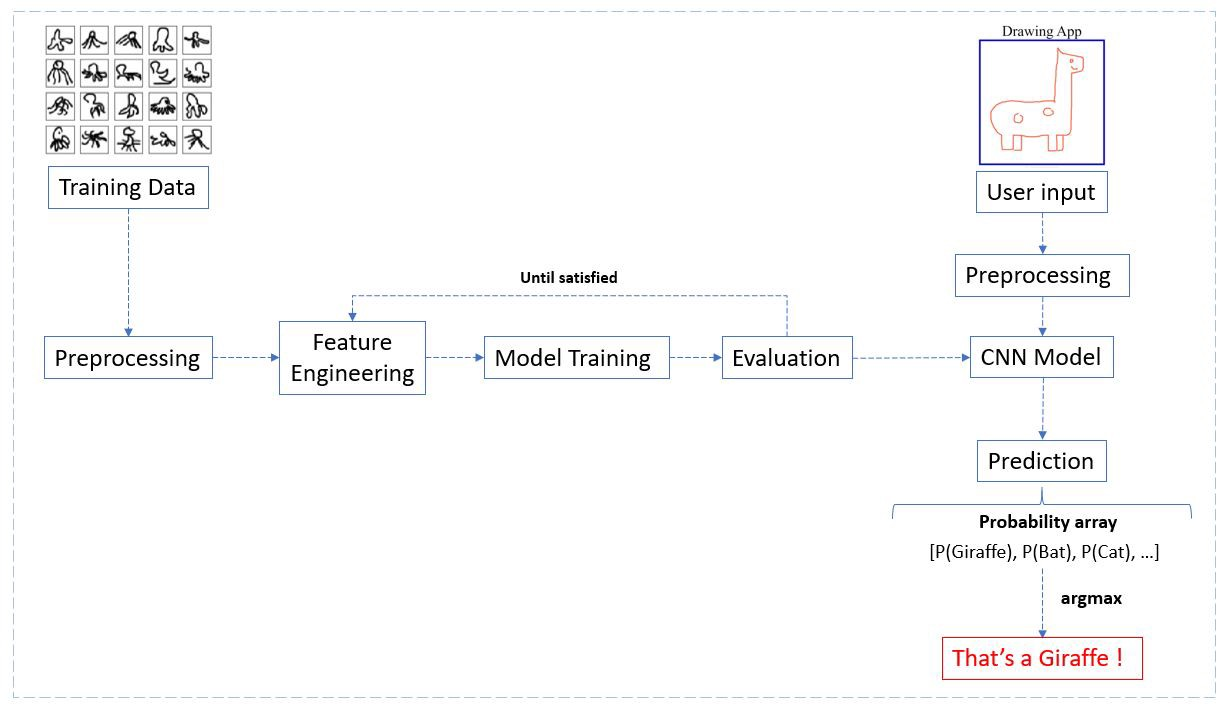

Reference: https://towardsdatascience.com/develop-an-interactive-drawing-recognition-app-based-on-cnn-deploy-it-with-flask-95a805de10c0

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

import keras
import keras.utils as np_utils
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
#from keras import backend as K
#K.set_image_dim_ordering('th')

from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

## Preprocessing

In [2]:
# load the data
arm = np.load('data/arm.npy')
#beard = np.load('data/beard.npy')
#brain = np.load('data/brain.npy')
ear = np.load('data/ear.npy')
#elbow = np.load('data/elbow.npy')
eye = np.load('data/eye.npy')
face = np.load('data/face.npy')
finger = np.load('data/finger.npy')
hand = np.load('data/hand.npy')
#knee = np.load('data/knee.npy')
leg = np.load('data/leg.npy')

mouth = np.load('data/mouth.npy')
#nail = np.load('data/nail.npy')
nose = np.load('data/nose.npy')
#skull = np.load('data/skull.npy')

tooth = np.load('data/tooth.npy')


In [3]:
moustache = np.load('data/moustache.npy')
toe = np.load('data/toe.npy')

arm = np.c_[arm, np.zeros(len(arm))]
ear = np.c_[ear, np.ones(len(ear))]
eye = np.c_[eye, 2*np.ones(len(eye))]
face = np.c_[face, 3*np.ones(len(face))]
finger = np.c_[finger, 4*np.ones(len(finger))]
hand = np.c_[hand, 5*np.ones(len(hand))]
leg = np.c_[leg, 5*np.ones(len(leg))]
mouth = np.c_[hand, 5*np.ones(len(hand))]
hand = np.c_[hand, 5*np.ones(len(hand))]
hand = np.c_[hand, 5*np.ones(len(hand))]

In [4]:
eye = np.c_[eye, np.zeros(len(eye))]

In [5]:
arm = np.c_[arm,np.ones(len(arm))]

In [6]:
face = np.c_[face,2*np.ones(len(face))]

In [7]:
finger = np.c_[finger,3*np.ones(len(finger))]
hand = np.c_[hand,4*np.ones(len(hand))]
leg = np.c_[leg,5*np.ones(len(leg))]
mouth = np.c_[mouth,6*np.ones(len(mouth))]

In [8]:
nose = np.c_[nose,7*np.ones(len(nose))]
ear = np.c_[ear,8*np.ones(len(ear))]

In [9]:

def plot_samples(input_array, rows=4, cols=5, title=''):
    '''
    Function to plot 28x28 pixel drawings that are stored in a numpy array.
    Specify how many rows and cols of pictures to display (default 4x5).  
    If the array contains less images than subplots selected, surplus subplots remain empty.
    '''
    fig, ax = plt.subplots(figsize=(cols,rows))
    ax.axis('off')
    plt.title(title)

    for i in list(range(0, min(len(input_array),(rows*cols)) )):      
        a = fig.add_subplot(rows,cols,i+1)
        imgplot = plt.imshow(input_array[i,:784].reshape((28,28)), cmap='gray_r', interpolation='nearest')
        plt.xticks([])
        plt.yticks([])

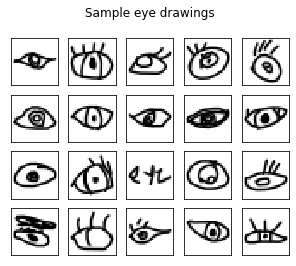

In [10]:
plot_samples(eye, title='Sample eye drawings\n')

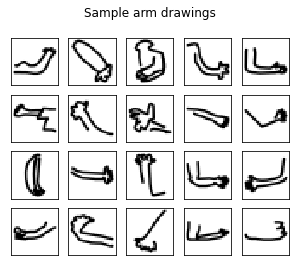

In [11]:
plot_samples(arm, title='Sample arm drawings\n')

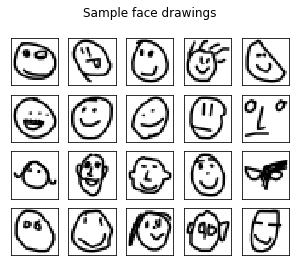

In [12]:
plot_samples(face, title='Sample face drawings\n')

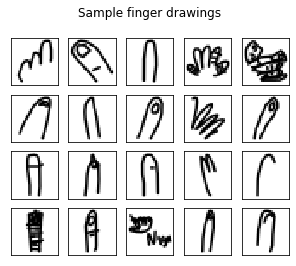

In [13]:
plot_samples(finger, title='Sample finger drawings\n')

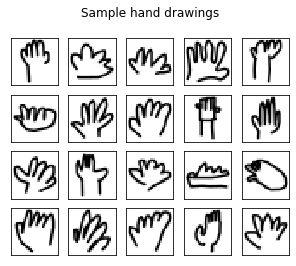

In [14]:
plot_samples(hand, title='Sample hand drawings\n')

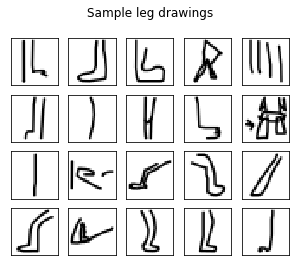

In [15]:
plot_samples(leg, title='Sample leg drawings\n')

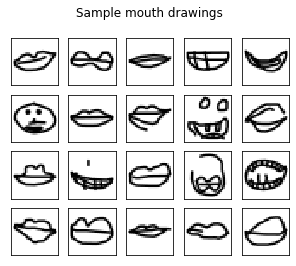

In [16]:
plot_samples(mouth, title='Sample mouth drawings\n')

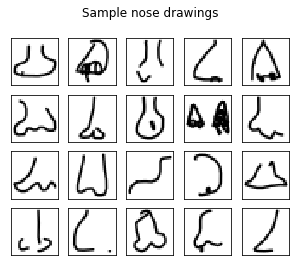

In [17]:
plot_samples(nose, title='Sample nose drawings\n')

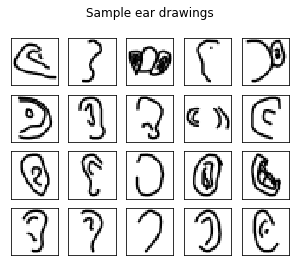

In [18]:
plot_samples(ear, title='Sample ear drawings\n')

In [19]:
y = np.concatenate((eye[:10000,-1], arm[:10000,-1], face[:10000,-1], finger[:10000,-1], hand[:10000,-1],  leg[:10000,-1], mouth[:10000, -1], nose[:10000, -1], ear[:10000, -1]), axis=0).astype('float32') # the last column

In [20]:

# Merging arrays and splitting the features and labels
X = np.concatenate((eye[:10000,:-1], arm[:10000,:-1], face[:10000,:-1], finger[:10000,:-1],  hand[:10000,:-1], leg[:10000, :-1], mouth[:10000, :-1], nose[:10000, :-1], ear[:10000, :-1]), axis=0).astype('float32') # all columns but the last


In [21]:
X_train,X_test, y_train, y_test = train_test_split(X/255., y, test_size = 0.2, random_state =0)

In [22]:
#one hot encoding the output
# one hot encode outputs
y_train_cnn = np_utils.to_categorical(y_train)
y_test_cnn = np_utils.to_categorical(y_test)
num_classes = y_test_cnn.shape[1]

In [23]:
# reshape to be [samples][pixels][width][height]
X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28,1).astype('float32')
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28,1).astype('float32')

In [24]:

def cnn_model():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (3, 3), input_shape=(28, 28,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [25]:
%%time
np.random.seed(0)
# build the model
model_cnn = cnn_model()
# Fit the model
model_cnn.fit(X_train_cnn, y_train_cnn, validation_data=(X_test_cnn, y_test_cnn), epochs=19, batch_size=200)
# Final evaluation of the model
scores = model_cnn.evaluate(X_test_cnn, y_test_cnn, verbose=0)
print('Final CNN accuracy: ', scores[1])

Epoch 1/19
360/360 [==============================] - 28s 75ms/step - loss: 1.1910 - accuracy: 0.6005 - val_loss: 0.5713 - val_accuracy: 0.8235
Epoch 2/19
360/360 [==============================] - 25s 71ms/step - loss: 0.5455 - accuracy: 0.8303 - val_loss: 0.4488 - val_accuracy: 0.8616
Epoch 3/19
360/360 [==============================] - 25s 70ms/step - loss: 0.4640 - accuracy: 0.8559 - val_loss: 0.4056 - val_accuracy: 0.8759
Epoch 4/19
360/360 [==============================] - 24s 68ms/step - loss: 0.4131 - accuracy: 0.8697 - val_loss: 0.3801 - val_accuracy: 0.8813
Epoch 5/19
360/360 [==============================] - 25s 68ms/step - loss: 0.3905 - accuracy: 0.8777 - val_loss: 0.3615 - val_accuracy: 0.8857
Epoch 6/19
360/360 [==============================] - 24s 68ms/step - loss: 0.3616 - accuracy: 0.8841 - val_loss: 0.3583 - val_accuracy: 0.8887
Epoch 7/19
360/360 [==============================] - 24s 68ms/step - loss: 0.3439 - accuracy: 0.8902 - val_loss: 0.3376 - val_accuracy:

In [26]:
y_pred_cnn = model_cnn.predict_classes(X_test_cnn, verbose=0)

from sklearn import metrics
c_matrix = metrics.confusion_matrix(y_test, y_pred_cnn)

C:\Users\Admin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [27]:
import seaborn as sns
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

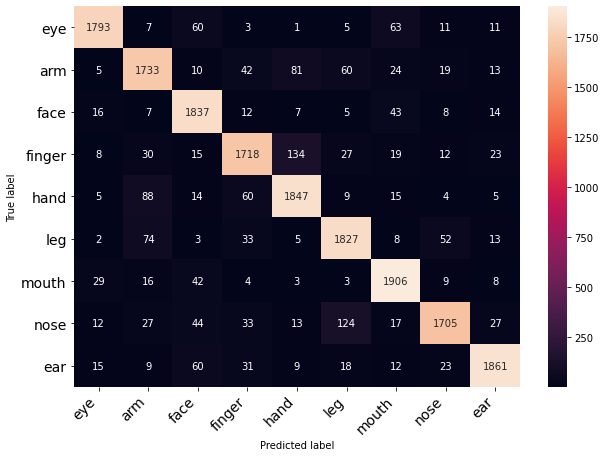

In [28]:
class_names = ['eye', 'arm', 'face', 'finger', 'hand', 'leg', 'mouth', 'nose', 'ear']
confusion_matrix(c_matrix, class_names, figsize = (10,7), fontsize=14)

In [29]:
#Misclassification when y_pred and y_test are different.
misclassified = X_test[y_pred_cnn != y_test]

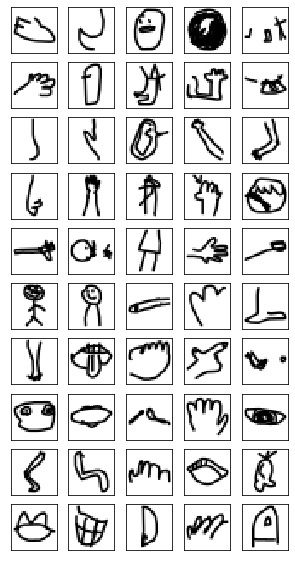

In [30]:
plot_samples(misclassified, rows=10, cols=5, title='')

In [31]:
import pickle

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.python.keras.layers import deserialize, serialize
from tensorflow.python.keras.saving import saving_utils


def unpack(model, training_config, weights):
    restored_model = deserialize(model)
    if training_config is not None:
        restored_model.compile(
            **saving_utils.compile_args_from_training_config(
                training_config
            )
        )
    restored_model.set_weights(weights)
    return restored_model

# Hotfix function
def make_keras_picklable():

    def __reduce__(self):
        model_metadata = saving_utils.model_metadata(self)
        training_config = model_metadata.get("training_config", None)
        model = serialize(self)
        weights = self.get_weights()
        return (unpack, (model, training_config, weights))

    cls = Model
    cls.__reduce__ = __reduce__

# Run the function
make_keras_picklable()

In [32]:

import pickle
with open('model_cnn.pkl', 'wb') as file:
      pickle.dump(model_cnn, file)

In [37]:
import flask
from flask import Flask,render_template,url_for,request
import pickle
import base64
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.python.keras.backend import set_session

#session = keras.backend.get_session()
#init = tf.global_variables_initializer()
#session.run(init)

#Initialize the useless part of the base64 encoded image.
init_Base64 = 21;

#Our dictionary
label_dict = {0:'eye', 1:'arm', 2:'face', 3:'finger', 4:'hand', 5:'leg', 6:'mouth', 7:"nose", 8:"ear"}
#'eye', 'arm', 'face', 'finger', 'hand', 'leg', 'mouth', 'nose', 'ear'


#tf_config = some_custom_config
sess = tf.compat.v1.Session()


#Initializing the Default Graph (prevent errors)
graph = tf.compat.v1.get_default_graph()
tf.compat.v1.disable_eager_execution()

#
    
    #Use pickle to load in the pre-trained model.
with open(f'model_cnn.pkl', 'rb') as f:
    set_session(sess)
    model = pickle.load(f)







In [ ]:
#Initializing new Flask instance. Find the html template in "templates".
app = flask.Flask(__name__, template_folder='templates')

#First route : Render the initial drawing template
@app.route('/')
def home():
    return render_template('draw.html')



#Second route : Use our model to make prediction - render the results page.
@app.route('/predict', methods=['POST'])
def predict():
        global graph
        with graph.as_default():
            if request.method == 'POST':
                    final_pred = None
                    #Preprocess the image : set the image to 28x28 shape
                    #Access the image
                    draw = request.form['url']
                    #Removing the useless part of the url.
                    draw = draw[init_Base64:]
                    #Decoding
                    draw_decoded = base64.b64decode(draw)
                    image = np.asarray(bytearray(draw_decoded), dtype="uint8")
                    image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)
                    #Resizing and reshaping to keep the ratio.
                    resized = cv2.resize(image, (28,28), interpolation = cv2.INTER_AREA)
                    vect = np.asarray(resized, dtype="uint8")
                    vect = vect.reshape(1, 28, 28,1).astype('float32')
                    #Launch prediction
                    set_session(sess)
                    my_prediction = model.predict(vect)
                    #Getting the index of the maximum prediction
                    index = np.argmax(my_prediction[0])
                    #Associating the index and its value within the dictionnary
                    final_pred = label_dict[index]

        return render_template('results.html', prediction =final_pred)

if __name__ == '__main__':
    app.run(debug=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [09/Sep/2021 14:04:06] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [09/Sep/2021 14:04:14] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [09/Sep/2021 14:04:14] "GET /static/draw.js HTTP/1.1" 304 -
127.0.0.1 - - [09/Sep/2021 14:04:42] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [09/Sep/2021 14:04:56] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [09/Sep/2021 14:05:10] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [09/Sep/2021 14:05:23] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [09/Sep/2021 14:05:48] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [09/Sep/2021 14:06:03] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [09/Sep/2021 14:06:06] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [09/Sep/2021 14:06:06] "GET /static/draw.js HTTP/1.1" 304 -
127.0.0.1 - - [09/Sep/2021 14:06:23] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [09/Sep/2021 14:06:29] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [09/Sep/2021 14:06:37] "POST /predict HTTP/1.1" 200 -
